In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import experiments
import pandas as pd

# to remove
from sklearn.semi_supervised.label_propagation import LabelSpreading
import numpy as np

In [4]:
pd.set_option('display.max_columns', 200)

In [5]:
%%time
network_intrusion = experiments.NetworkIntrusionDetection()

CPU times: user 15.7 s, sys: 2.09 s, total: 17.8 s
Wall time: 6.33 s


In [6]:
network_intrusion.df.shape

(494021, 42)

In [7]:
%%time
network_intrusion.report_labels()

CPU times: user 672 ms, sys: 53 ms, total: 725 ms
Wall time: 385 ms


attacks  prevalence  prevalence (overall)  records
label                                                           
smurf.         280790    0.742697              0.568377   378068
neptune.       107201    0.524264              0.216997   204479
back.            2203    0.022145              0.004459    99481
satan.           1589    0.016072              0.003216    98867
ipsweep.         1247    0.012657              0.002524    98525
portsweep.       1040    0.010578              0.002105    98318
warezclient.     1020    0.010377              0.002065    98298
teardrop.         979    0.009964              0.001982    98257
pod.              264    0.002707              0.000534    97542
nmap.             231    0.002369              0.000468    97509

In [8]:
%%time
df_baseline_oracle = network_intrusion.report_baseline_oracle()

CPU times: user 22.7 s, sys: 6.08 s, total: 28.7 s
Wall time: 17.9 s


In [9]:
df_baseline_oracle

baseline_random_FN  baseline_random_FP  baseline_random_f1  \
label                                                                      
smurf.                    7186.5              7214.0            0.743104   
neptune.                  5104.5              5080.5            0.525150   
back.                      215.5               226.0            0.020227   
satan.                     155.0               155.5            0.026016   
ipsweep.                   123.5               122.5            0.011177   
portsweep.                 103.0                97.5            0.009501   
warezclient.               101.0               103.0            0.009179   
teardrop.                   97.0                97.0            0.009975   
pod.                        26.0                26.0            0.000000   
nmap.                       23.0                23.0            0.000000   

              baseline_random_precision  baseline_random_recall  \
label                                                             
smurf.                         0.743598                0.744061   
neptune.                       0.526556                0.523834   
back.                          0.020008                0.020455   
satan.                         0.026936                0.025157   
ipsweep.                       0.010597                0.012000   
portsweep.                     0.009390                0.009615   
warezclient.                   0.008637                0.009804   
teardrop.                      0.009756                0.010204   
pod.                           0.000000                0.000000   
nmap.                          0.000000                0.000000   

              baseline_unsupervised_FN  baseline_unsupervised_FP  \
label                                                              
smurf.                           19212                      9728   
neptune.                          5485                      5534   
back.                              202                       180   
satan.                              13                        16   
ipsweep.                           116                       130   
portsweep.                          50                        44   
warezclient.                       101                        84   
teardrop.                           68                        73   
pod.                                26                        39   
nmap.                               11                        12   

              baseline_unsupervised_f1  baseline_unsupervised_precision  \
label                                                                     
smurf.                        0.379955                         0.476849   
neptune.                      0.487226                         0.486118   
back.                         0.086124                         0.090909   
satan.                        0.909657                         0.901235   
ipsweep.                      0.068182                         0.064748   
portsweep.                    0.534653                         0.551020   
warezclient.                  0.010695                         0.011765   
teardrop.                     0.298507                         0.291262   
pod.                          0.000000                         0.000000   
nmap.                         0.510638                         0.500000   

              baseline_unsupervised_recall  oracle_FN  oracle_FP  \
label                                                              
smurf.                            0.315788          0          0   
neptune.                          0.488340          1          0   
back.                             0.081818          0          0   
satan.                            0.918239          0          0   
ipsweep.                          0.072000          0          0   
portsweep.                        0.519231          1          0   
warezclient.                      

In [10]:
df_baseline_oracle.mean().round(2)

baseline_random_FN                 1313.50
baseline_random_FP                 1314.50
baseline_random_f1                    0.14
baseline_random_precision             0.14
baseline_random_recall                0.14
baseline_unsupervised_FN           2528.40
baseline_unsupervised_FP           1584.00
baseline_unsupervised_f1              0.33
baseline_unsupervised_precision       0.34
baseline_unsupervised_recall          0.32
oracle_FN                             0.50
oracle_FP                             0.00
oracle_average precision              1.00
oracle_f1                             1.00
oracle_precision                      1.00
oracle_recall                         0.99
oracle_roc auc                        1.00
oracle_train time (s)                 0.26
prevalence                            0.14
dtype: float64

In [11]:
df_baseline_oracle.std().round(2)

baseline_random_FN                 2594.14
baseline_random_FP                 2596.90
baseline_random_f1                    0.27
baseline_random_precision             0.27
baseline_random_recall                0.27
baseline_unsupervised_FN           6104.01
baseline_unsupervised_FP           3337.23
baseline_unsupervised_f1              0.29
baseline_unsupervised_precision       0.30
baseline_unsupervised_recall          0.30
oracle_FN                             0.71
oracle_FP                             0.00
oracle_average precision              0.00
oracle_f1                             0.01
oracle_precision                      0.00
oracle_recall                         0.01
oracle_roc auc                        0.00
oracle_train time (s)                 0.19
prevalence                            0.27
dtype: float64

In [7]:
clf = network_intrusion.semi_supervised_class(**network_intrusion.semi_supervised_class_args)

In [13]:
active_learning_data = network_intrusion._active_learning_data_split('nmap.')
x, y = network_intrusion._construct_semi_supervised_data(active_learning_data.x_train_start,
                                                        active_learning_data.y_train_start,
                                                        active_learning_data.x_train_pool,
                                                        active_learning_data.y_train_pool, [])

In [15]:
x.shape

(78007, 78)

In [16]:
y.shape

(78007,)

In [18]:
clf.fit(x, y.astype(np.int))

/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer


LabelSpreading(alpha=0.2, gamma=20, kernel='knn', max_iter=5, n_jobs=1,
        n_neighbors=7, tol=0.001)

In [24]:
q = clf.predict_proba(active_learning_data.x_dev)

In [25]:
q

array([[nan, nan],
       [ 1.,  0.],
       [ 1.,  0.],
       ...,
       [nan, nan],
       [ 1.,  0.],
       [nan, nan]])

In [23]:
pd.Series(q).value_counts()

0    9751
dtype: int64

In [ ]:
clf.predict_proba()

In [ ]:
network_intrusion._semi_supervised('nmap.')

Label: nmap., learner: NoneType, sampling strategy: random_sampling


/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

Query # 1 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= nor

/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

Query # 26 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= nor

/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

Query # 51 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: divide by zero encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:297: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, wa

In [15]:
df_semi_supervised_report = network_intrusion.report_semi_supervised()

Label: smurf., learner: NoneType, sampling strategy: random_sampling


TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [274]:
df_active_learning_report = network_intrusion.report_active_learning()

Label: smurf., learner: RandomForestClassifier, sampling strategy: random_sampling
Query # 1 to the analyst
Query # 26 to the analyst
Query # 51 to the analyst
Query # 76 to the analyst
Label: smurf., learner: RandomForestClassifier, sampling strategy: entropy_sampling
Query # 1 to the analyst
Query # 26 to the analyst
Query # 51 to the analyst
Query # 76 to the analyst
Label: smurf., learner: LogisticRegression, sampling strategy: random_sampling
Query # 1 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Query # 26 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Query # 51 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Query # 76 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Label: smurf., learner: LogisticRegression, sampling strategy: entropy_sampling
Query # 1 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Query # 26 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Query # 51 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Query # 76 to the analyst


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

Label: neptune., learner: RandomForestClassifier, sampling strategy: random_sampling
Query # 1 to the analyst
Query # 26 to the analyst
Query # 51 to the analyst


KeyboardInterrupt: 

In [379]:
(df_active_learning_report
 .groupby(['learner', 'sampling strategy'])
 .agg([np.mean, np.std])
).round(2)

initial_FN        initial_FP  \
                                                  mean    std       mean   
learner                sampling strategy                                   
LogisticRegression     entropy_sampling           20.2  29.86       14.8   
                       random_sampling            20.2  29.86       14.8   
                       uncertainty_sampling       20.2  29.86       14.8   
RandomForestClassifier entropy_sampling            6.9   6.49        0.6   
                       random_sampling             8.6   5.99        0.2   
                       uncertainty_sampling        9.7   7.02        2.9   

                                                   initial_average precision  \
                                               std                      mean   
learner                sampling strategy                                       
LogisticRegression     entropy_sampling      17.18                      0.72   
                       random_sampling       17.18                      0.72   
                       uncertainty_sampling  17.18                      0.72   
RandomForestClassifier entropy_sampling       1.26                      0.96   
                       random_sampling        0.63                      0.96   
                       uncertainty_sampling   7.82                      0.96   

                                                  initial_f1        \
                                              std       mean   std   
learner                sampling strategy                             
LogisticRegression     entropy_sampling      0.36       0.76  0.32   
                       random_sampling       0.36       0.76  0.32   
                       uncertainty_sampling  0.36       0.76  0.32   
RandomForestClassifier entropy_sampling      0.06       0.92  0.13   
                       random_sampling       0.09       0.90  0.14   
                       uncertainty_sampling  0.08       0.91  0.11   

                                            initial_precision        \
                                                         mean   std   
learner                sampling strategy                              
LogisticRegression     entropy_sampling                  0.76  0.33   
                       random_sampling                   0.76  0.33   
                       uncertainty_sampling              0.76  0.33   
RandomForestClassifier entropy_sampling                  0.99  0.01   
                       random_sampling                   1.00  0.01   
                       uncertainty_sampling              0.98  0.05   

                                            initial_recall        \
                                                      mean   std   
learner                sampling strategy                           
LogisticRegression     entropy_sampling               0.76  0.31   
                       random_sampling                0.76  0.31   
                       uncertainty_sampling           0.76  0.31   
RandomForestClassifier entropy_sampling               0.87  0.20   
                       random_sampling                0.85  0.20   
                       uncertainty_sampling           0.88  0.18   

                                            initial_roc auc        \
                                                       mean   std   
learner                sampling strategy                            
LogisticRegression     entropy_sampling                0.97  0.04   
                       random_sampling                 0.97  0.04   
                       uncertainty_sampling            0.97  0.04   
RandomForestClassifier entropy_sampling                0.98  0.03   
                       random_sampling                 0.99  0.03   
                       uncertainty_sampling            0.98  0.03   

                                            sample_100_FN       sample_100_FP  \
                                                   

In [ ]:
df_active_learning_report.sam

In [387]:
x = {}
for learner_name in ['RandomForestClassifier', 'LogisticRegression']:
    for sampling_strategy_name in ['uncertainty_sampling', 'random_sampling', 'entropy_sampling']:
        concat = []
        for label in kdd.features:
            label_clean = label.replace('.', '')
            file_path = f'{label_clean}_{learner_name}_{sampling_strategy_name}'
            file_path_csv = f'{file_path}.csv'
            df = pd.read_csv(file_path_csv)
            concat += list(df['query time (s)'])
            
        xs = pd.Series(concat)
        mean = round(xs.mean(), 2)
        std = round(xs.std(), 2)
        x[(learner_name, sampling_strategy_name)] = {f'{mean}±{std}'}
        
x

{('RandomForestClassifier', 'uncertainty_sampling'): {'0.16±0.06'},
 ('RandomForestClassifier', 'random_sampling'): {'0.09±0.07'},
 ('RandomForestClassifier', 'entropy_sampling'): {'0.12±0.08'},
 ('LogisticRegression', 'uncertainty_sampling'): {'0.1±0.08'},
 ('LogisticRegression', 'random_sampling'): {'0.09±0.08'},
 ('LogisticRegression', 'entropy_sampling'): {'0.08±0.08'}}

In [413]:
d.shape

(202, 6)

In [421]:
def plot_it(file_path):
    d = pd.read_csv(file_path).iloc[-101:].reset_index(drop=True)
    d.f1.plot()

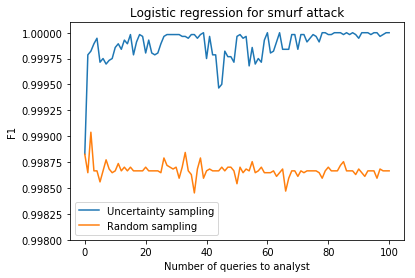

In [453]:
plot_it('smurf_LogisticRegression_uncertainty_sampling.csv')
plot_it('smurf_LogisticRegression_random_sampling.csv')
plt.ylim([0.9980, 1.0001])
plt.ylabel('F1')
plt.xlabel('Number of queries to analyst')
plt.title('Logistic regression for smurf attack')
plt.legend(['Uncertainty sampling', 'Random sampling'])

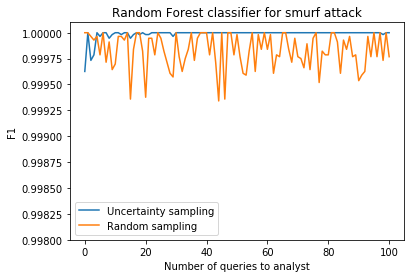

In [456]:
plot_it('smurf_RandomForestClassifier_uncertainty_sampling.csv')
plot_it('smurf_RandomForestClassifier_random_sampling.csv')
plt.ylim([0.9980, 1.0001])
plt.ylabel('F1')
plt.xlabel('Number of queries to analyst')
plt.title('Random Forest classifier for smurf attack')
plt.legend(['Uncertainty sampling', 'Random sampling'])

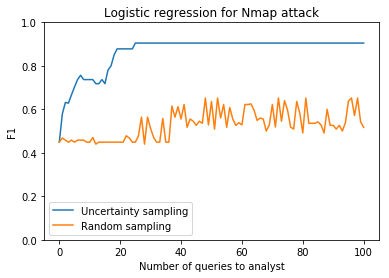

In [458]:
plot_it('nmap_LogisticRegression_uncertainty_sampling.csv')
plot_it('nmap_LogisticRegression_random_sampling.csv')
plt.ylim([0, 1])
plt.ylabel('F1')
plt.xlabel('Number of queries to analyst')
plt.title('Logistic regression for Nmap attack')
plt.legend(['Uncertainty sampling', 'Random sampling'])

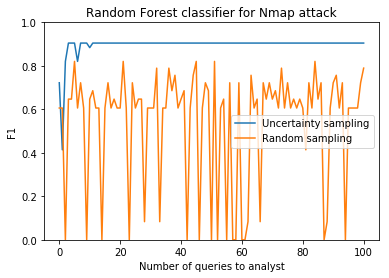

In [459]:
plot_it('nmap_RandomForestClassifier_entropy_sampling.csv')
plot_it('nmap_RandomForestClassifier_random_sampling.csv')
plt.ylim([0, 1])
plt.ylabel('F1')
plt.xlabel('Number of queries to analyst')
plt.title('Random Forest classifier for Nmap attack')
plt.legend(['Uncertainty sampling', 'Random sampling'])